# Section 0: Import Packages

In [1]:
# Data manipulation and visualisation
import pandas as pd                                                           # to deal with pandas dataframe
import numpy as np                                                            # to deal with numbers
import matplotlib.pyplot as plt                                               # to plot graphs

# Statistical analysis
from statsmodels.graphics import tsaplots                                     # to plot graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf                 # to plot ACF and PACF graphs
from statsmodels.tsa.stattools import adfuller                                # to perform ADF test
import statsmodels.api as sm                                                  # for various statistical models
import pmdarima as pm                                                         # for auto ARIMA model
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch             # diagnostic tests
from arch import arch_model                                                   # for GARCH model
from statsmodels.tsa.holtwinters import ExponentialSmoothing                  # for Holt's method model

# Machine learning
import tensorflow as tf                                                       # for deep learning
from scipy.stats import randint, uniform                                      # for distribution used in RandomizedSearchCY
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # to assess models' performance
from sklearn.preprocessing import StandardScaler                              # for data scaling
from keras.models import Sequential                                           # to build neural network models
from keras.layers import LSTM, Dense, Dropout                                 # for LSTM networks
from tensorflow.keras.optimizers import Adam                                  # for model optimization
from scikeras.wrappers import KerasRegressor                                  # to integrate Keras with scikit-learn
from sklearn.model_selection import RandomizedSearchCV                        # for hyperparameter tuning

In [2]:
tf.keras.utils.set_random_seed(15) # ensure reproducibility of LSTM results

# Section 1: Data Pre-processing

This section shows importing necessary packages, and data importation and cleaning.

## Section 1.1: Import Data

In [3]:
dataset = pd.read_csv('C:\Desktop\smr20_2000-2024.csv')            # read SMR20 dataset 
dataset['Date'] = pd.to_datetime(dataset['Date'])                  # convert Date column to datetime
dataset.head()                                                     # show the first 5 rows of the data for review

,Date,Price
0,2000-01-01,190.75
1,2000-02-01,214.69
2,2000-03-01,228.11
3,2000-04-01,224.75
4,2000-05-01,230.71


## Section 1.2: Data Cleaning

In [4]:
dataset.info()                                                  # print information summary of the dataset 
null = dataset.isnull().sum()                                   # find the total no. of missing values in each column
df_null = pd.DataFrame(data = null, columns = ['No. of Null'])  # create a dataframe to show the number of null
print('\n\n', df_null)                                          # number of null in each column is shown
print(f'\n\nThe total no. of null is  {sum(null)}')             # the total number of null is shown

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    291 non-null    datetime64[ns]
 1   Price   291 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


        No. of Null
Date             0
Price            0


The total no. of null is  0


# Section 2: Exploratory Data Analysis

## Section 2.1: Descriptive Statistics

In [5]:
# Determine the summary statistics of the date column
dataset.Date.describe()

<ipython-input-5-9d7bf03ed633>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.Date.describe()


count                     291
unique                    291
top       2009-08-01 00:00:00
freq                        1
first     2000-01-01 00:00:00
last      2024-03-01 00:00:00
Name: Date, dtype: object

In [6]:
# Determine the summary statistics of dataset (by default numerical columns)
dataset.describe()

,Price
count,291.000000
mean,476.634467
std,175.578101
min,150.000000
25%,377.135000
50%,472.900000
75%,573.055000
max,1059.530000


In [7]:
# Determine the minimum, maximum, average and standard deviation of each numerical column in each year
for col in dataset.select_dtypes(exclude=['datetime64[ns]']).columns:
 desc_stat = dataset.groupby(dataset.Date.dt.year)[[col]].agg(['min','max','mean','std'])
 print(f'\nDescriptive Statistics of:{desc_stat}')
 print("\n")


Descriptive Statistics of:       Price                                 
         min      max        mean         std
Date                                         
2000  181.25   230.71  202.524167   18.142278
2001  150.00   182.74  170.049167    9.045935
2002  160.18   234.36  206.340833   23.223704
2003  230.43   352.91  287.664167   33.580611
2004  292.80   356.53  330.785000   19.918315
2005  304.43   432.40  380.805000   40.806962
2006  393.05   652.41  509.911667   89.936790
2007  443.91   573.03  514.109167   40.243753
2008  334.65   691.98  568.763333  104.688511
2009  385.37   587.05  447.369167   60.588799
2010  657.25   944.29  742.597500   79.418672
2011  668.26  1059.53  892.479167  126.197211
2012  560.95   782.91  659.717500   81.719944
2013  512.45   615.26  561.721667   38.373732
2014  362.23   490.50  437.657500   44.013288
2015  358.67   496.52  411.855833   37.549850
2016  347.53   615.88  457.381667   73.451304
2017  473.11   798.36  594.659167  107.954445
2018  3

## Section 2.2: Data Visualization

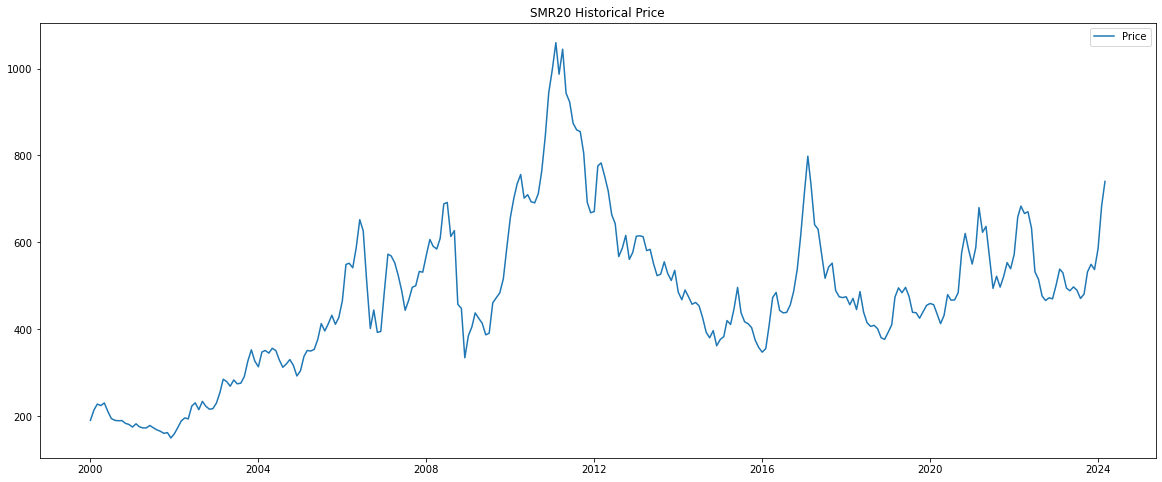

In [8]:
# Plot the price over certain number of periods
plt.figure(figsize = (20,8))
plt.plot(dataset['Date'],dataset['Price'],label='Price')
plt.legend(loc=0)
plt.title('SMR20 Historical Price')
plt.show()

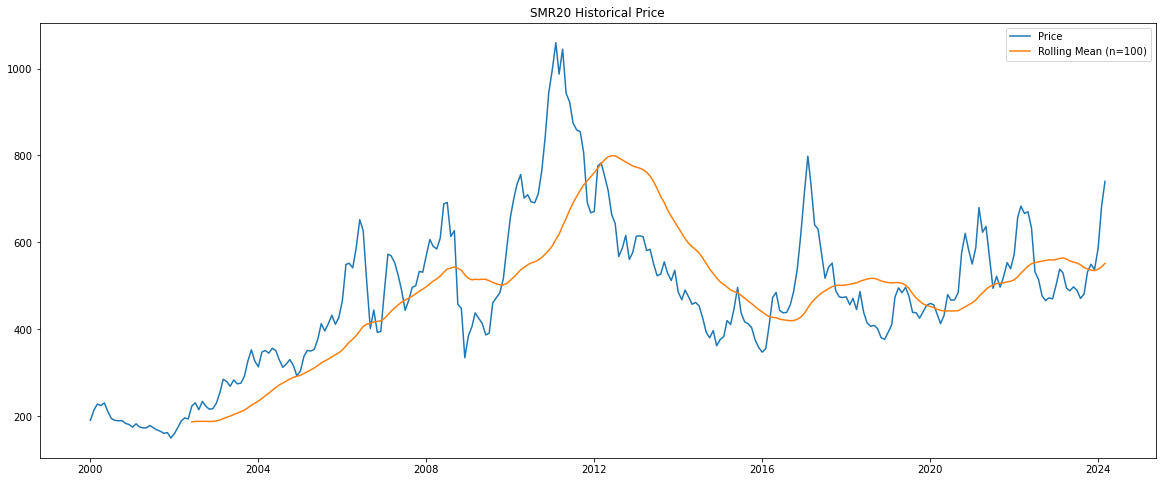

In [9]:
# Plot the actual price and its rolling mean over certain number of previous periods
plt.figure(figsize = (20,8))
plt.plot(dataset['Date'],dataset['Price'],label='Price')
plt.plot(dataset['Date'],dataset['Price'].rolling(30).mean(),label='Rolling Mean (n=100)')
plt.legend(loc=0)
plt.title('SMR20 Historical Price')
plt.show()

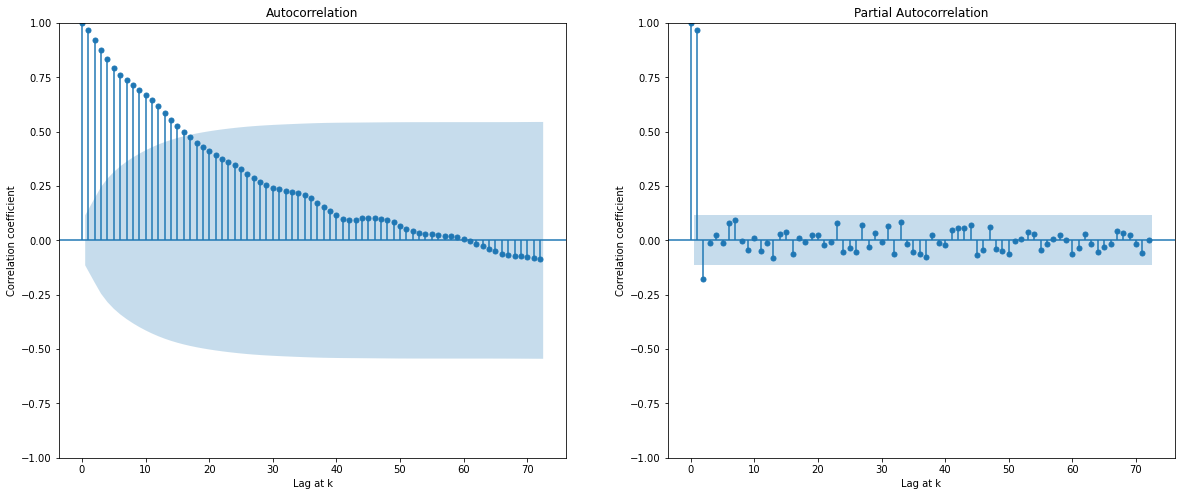

In [10]:
fig, ax= plt.subplots(1,2,figsize=(20, 8))
# Autocorrelation plot
fig=tsaplots.plot_acf(dataset['Price'], lags=72, alpha=0.05, ax=ax[0])
# Partial autocorrelation plot
fig=tsaplots.plot_pacf(dataset['Price'], lags=72,  alpha=0.05, ax=ax[1])
for i in ax.flat:
   i.set(xlabel='Lag at k', ylabel='Correlation coefficient')
plt.show()

# Section 3: Data Splitting and Feature Scaling

In [11]:
# Set Date column as index
dataset.set_index('Date', inplace=True)

In [12]:
# Ensure the data is sorted by Date
dataset.sort_index(inplace=True)
dataset

,Price
Date,
2000-01-01,190.75
2000-02-01,214.69
2000-03-01,228.11
2000-04-01,224.75
2000-05-01,230.71
...,...
2023-11-01,549.67
2023-12-01,537.63
2024-01-01,585.74


In [13]:
# Define the proportion of data to use for training
train_size = 0.9  # 90% of the data for training

# Calculate the index at which to split the data
split_index = int(len(dataset) * train_size)

# Split the data into training and testing sets
train, test = dataset[:split_index], dataset[split_index:]

# check the shape of train and test
train.shape, test.shape

((261, 1), (30, 1))

In [14]:
stat_train = train.copy()
stat_test = test.copy()

In [15]:
ml_train = train.copy()
ml_test = test.copy()

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
train_data = scaler.fit_transform(ml_train)
test_data = scaler.transform(ml_test)

# Section 4: Analysis

## Section 4.1: ARIMA Model

In [17]:
result = adfuller(stat_train.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.457428
p-value: 0.126179


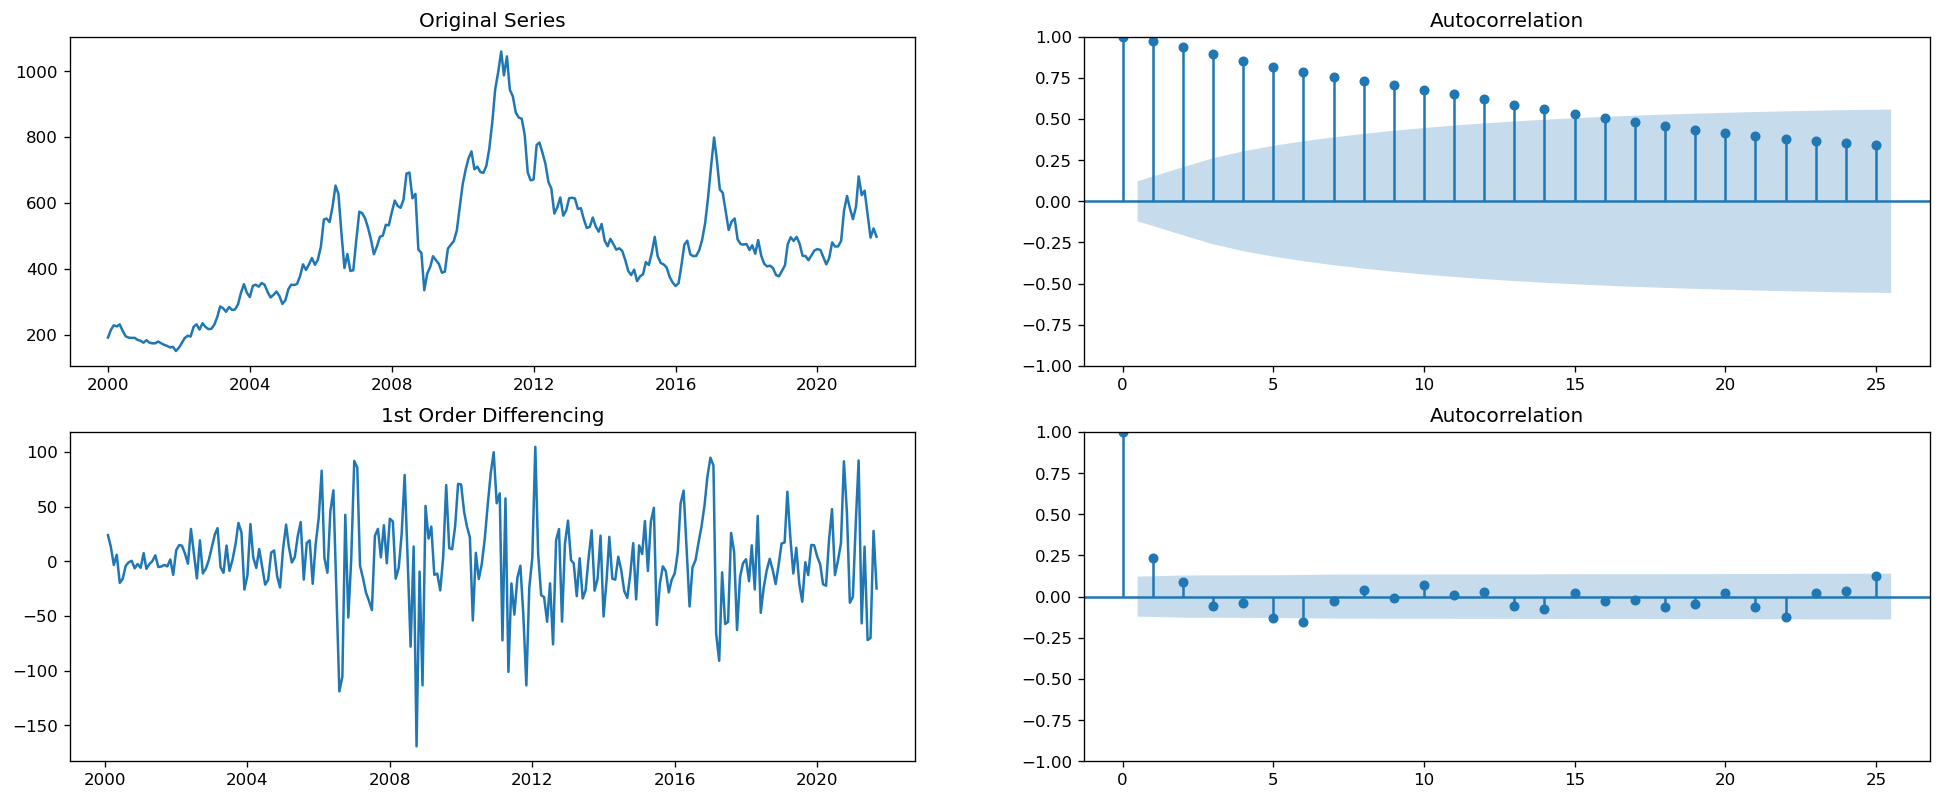

In [18]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes[0, 0].plot(stat_train); axes[0, 0].set_title('Original Series')
plot_acf(stat_train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(stat_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(stat_train.diff().dropna(), ax=axes[1, 1])

plt.show()

In [19]:
result = adfuller(stat_train.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.601160
p-value: 0.000000


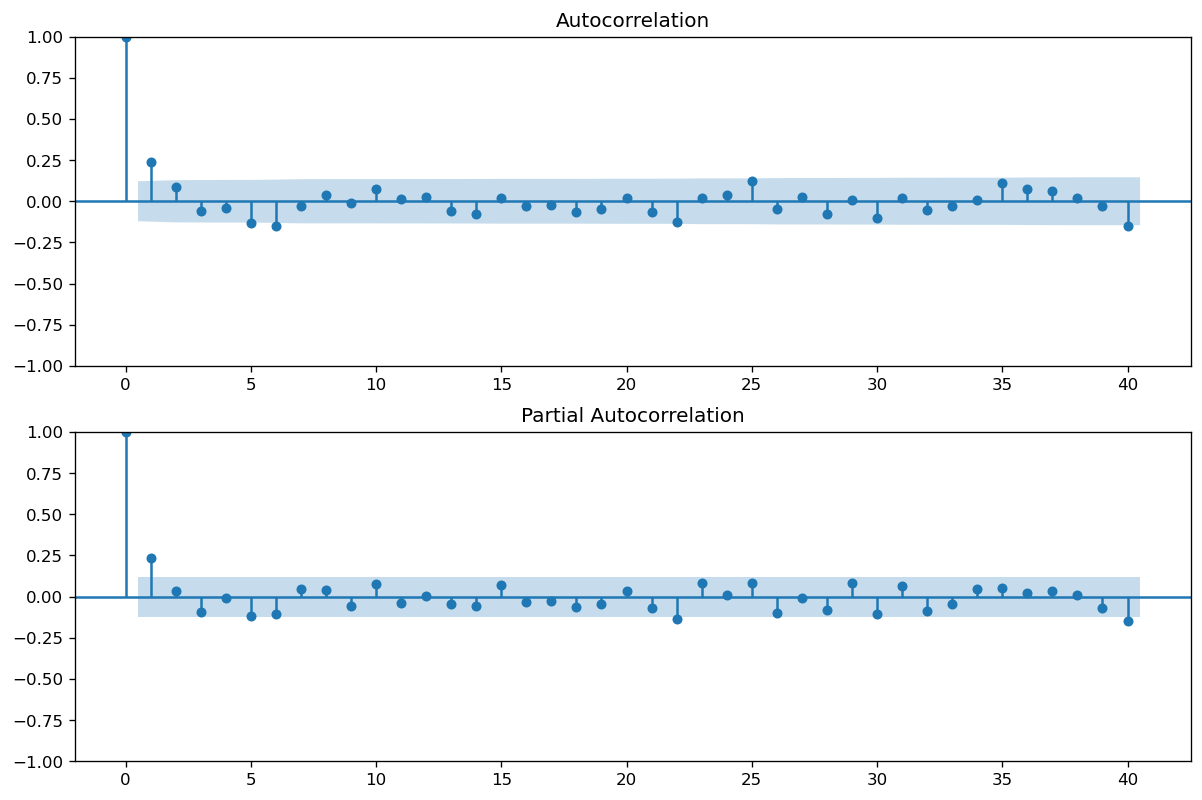

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stat_train.diff().dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stat_train.diff().dropna(),lags=40,ax=ax2)

In [21]:
model = sm.tsa.ARIMA(stat_train, order=(1,1,0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  261
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1316.226
Date:                Sat, 01 Jun 2024   AIC                           2636.452
Time:                        19:16:29   BIC                           2643.573
Sample:                    01-01-2000   HQIC                          2639.315
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2361      0.048      4.928      0.000       0.142       0.330
sigma2      1460.7659     91.566     15.953      0.000    1281.300    1640.232
Ljung-Box (L1) (Q):                   0.02   Jarque-

C:\Users\lynnl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lynnl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lynnl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
pmd_model = pm.auto_arima(stat_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(pmd_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2640.156, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2651.146, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2638.308, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2640.242, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2649.379, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2640.038, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2640.645, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2636.452, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2638.174, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2638.295, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2638.408, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2638.781, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.804 seconds
                               SARIMAX Results                                
Dep. Vari

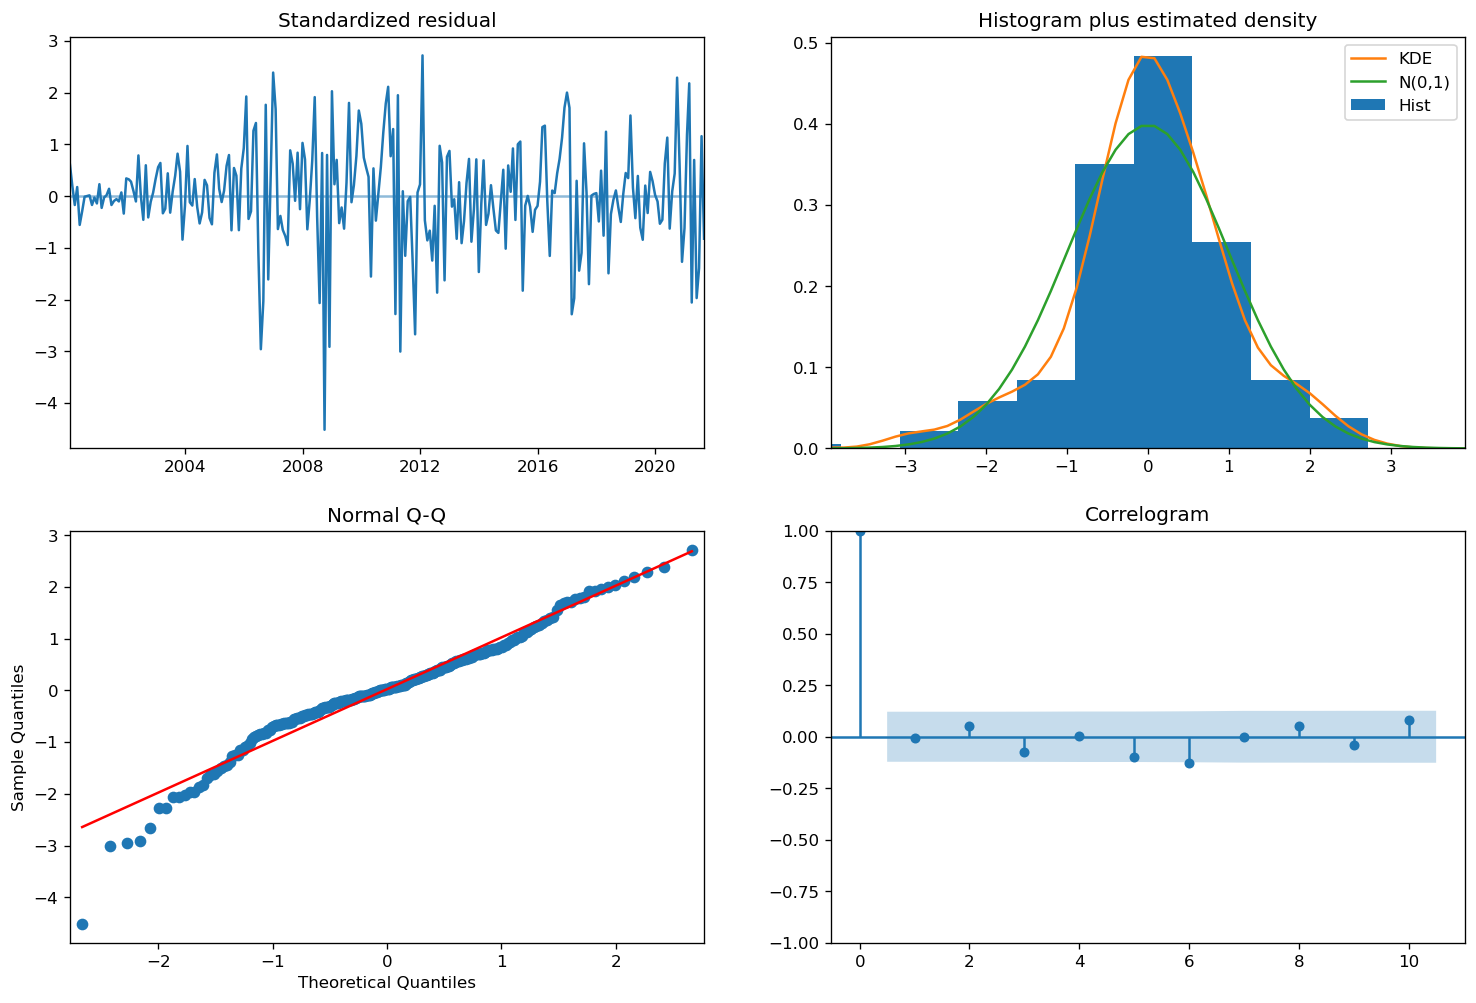

In [23]:
pmd_model.plot_diagnostics(figsize = (15, 10))
plt.show()

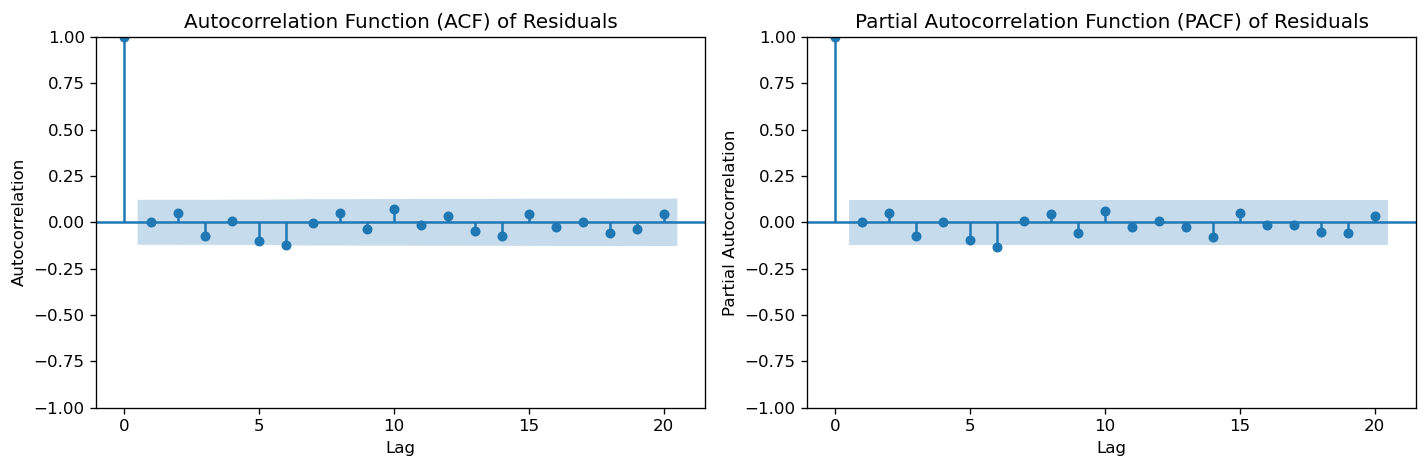

In [24]:
# Compute ACF for the residuals
residuals = pd.DataFrame(model.resid)
acf = sm.tsa.acf(residuals)

# Plot ACF
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=20, ax=plt.gca())  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()

In [25]:
white_noise_arima = acorr_ljungbox(residuals, lags = [10], return_df=True)
white_noise_arima

,lb_stat,lb_pvalue
10,11.256158,0.337912


In [26]:
LM_pvalue = het_arch(residuals, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))

LM-test-Pvalue: 0.00012


In [27]:
mdl_garch = arch_model(residuals, vol = 'GARCH', p = 1, q = 1)
res_fit = mdl_garch.fit()
print(res_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1682.7786697645754
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1295.9558623476537
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1296.2861194301731
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1295.899144225736
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1295.8743752472967
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1295.8596553768684
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1295.7765112530624
Iteration:      8,   Func. Count:     43,   Neg. LLF: 1295.635335026114
Iteration:      9,   Func. Count:     48,   Neg. LLF: 1295.3476965663026
Iteration:     10,   Func. Count:     53,   Neg. LLF: 1294.9833234675461
Iteration:     11,   Func. Count:     58,   Neg. LLF: 1294.7499180554523
Iteration:     12,   Func. Count:     63,   Neg. LLF: 1294.7107930683733
Iteration:     13,   Func. Count:     68,   Neg. LLF: 1294.7097385537745
Iteration:     14,   Func. Count:     73,   Neg. LLF:

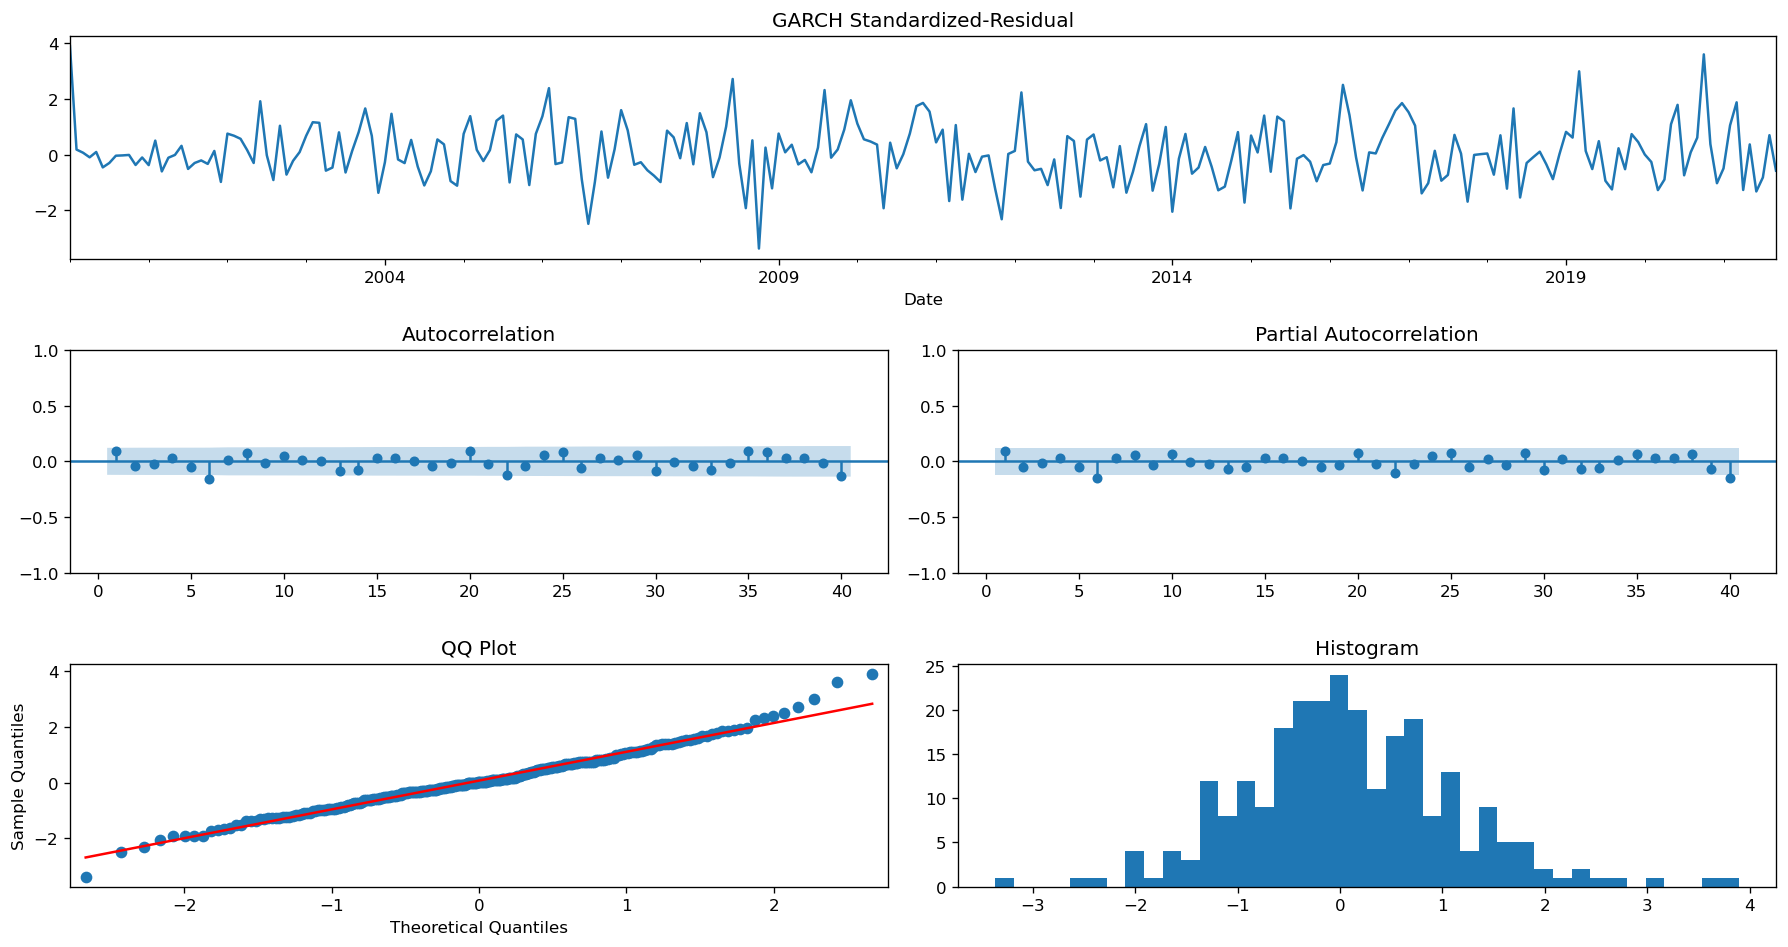

In [28]:
garch_fit = res_fit

garch_std_resid = pd.Series(garch_fit.resid / garch_fit.conditional_volatility)
fig = plt.figure(figsize=(15, 8))

# Residual
garch_std_resid.plot(ax=fig.add_subplot(3, 1, 1), title='GARCH Standardized-Residual', legend=False)

# ACF/PACF
tsaplots.plot_acf(garch_std_resid, zero=False, lags=40, ax=fig.add_subplot(3, 2, 3))
tsaplots.plot_pacf(garch_std_resid, zero=False, lags=40, ax=fig.add_subplot(3, 2, 4))

# QQ-Plot & Norm-Dist
sm.qqplot(garch_std_resid, line='s', ax=fig.add_subplot(3, 2, 5))
plt.title("QQ Plot")
fig.add_subplot(3, 2, 6).hist(garch_std_resid, bins=40)
plt.title("Histogram")

plt.tight_layout()
plt.show()

In [29]:
white_noise_garch = acorr_ljungbox(garch_std_resid, lags = [10], return_df=True)
white_noise_garch

,lb_stat,lb_pvalue
10,12.472495,0.254677


In [30]:
LM_pvalue = het_arch(garch_std_resid, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))

LM-test-Pvalue: 0.84295


In [31]:
forecast_train = model.predict(start = stat_train.index[1], end = stat_train.index[-1]) #When d=1 the first residual is nonsense
forecast_test = model.predict(start = len(stat_train), end = len(dataset)-1) 

In [32]:
# Use GARCH to predict the residual
garch_forecast = garch_fit.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# Combine both models' output: yt = mu + et
train_prediction = forecast_train + predicted_et
test_prediction = forecast_test + predicted_et

C:\Users\lynnl\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [33]:
stat_train.loc[:, 'ARIMA-GARCH Forecast'] = train_prediction
stat_train

,Price,ARIMA-GARCH Forecast
Date,,
2000-01-01,190.75,NaN
2000-02-01,214.69,191.652533
2000-03-01,228.11,221.175244
2000-04-01,224.75,232.111454
2000-05-01,230.71,224.789667
...,...,...
2021-05-01,636.76,610.822391
2021-06-01,564.62,640.747288
2021-07-01,494.38,548.420591


In [34]:
stat_test.loc[:, 'ARIMA-GARCH Forecast'] = test_prediction
stat_test

,Price,ARIMA-GARCH Forecast
Date,,
2021-10-01,521.20,492.196397
2021-11-01,553.64,490.808928
2021-12-01,539.45,490.481345
2022-01-01,572.08,490.404002
2022-02-01,658.14,490.385741
2022-03-01,683.57,490.381429
2022-04-01,666.47,490.380411
2022-05-01,670.69,490.380171
2022-06-01,632.69,490.380114


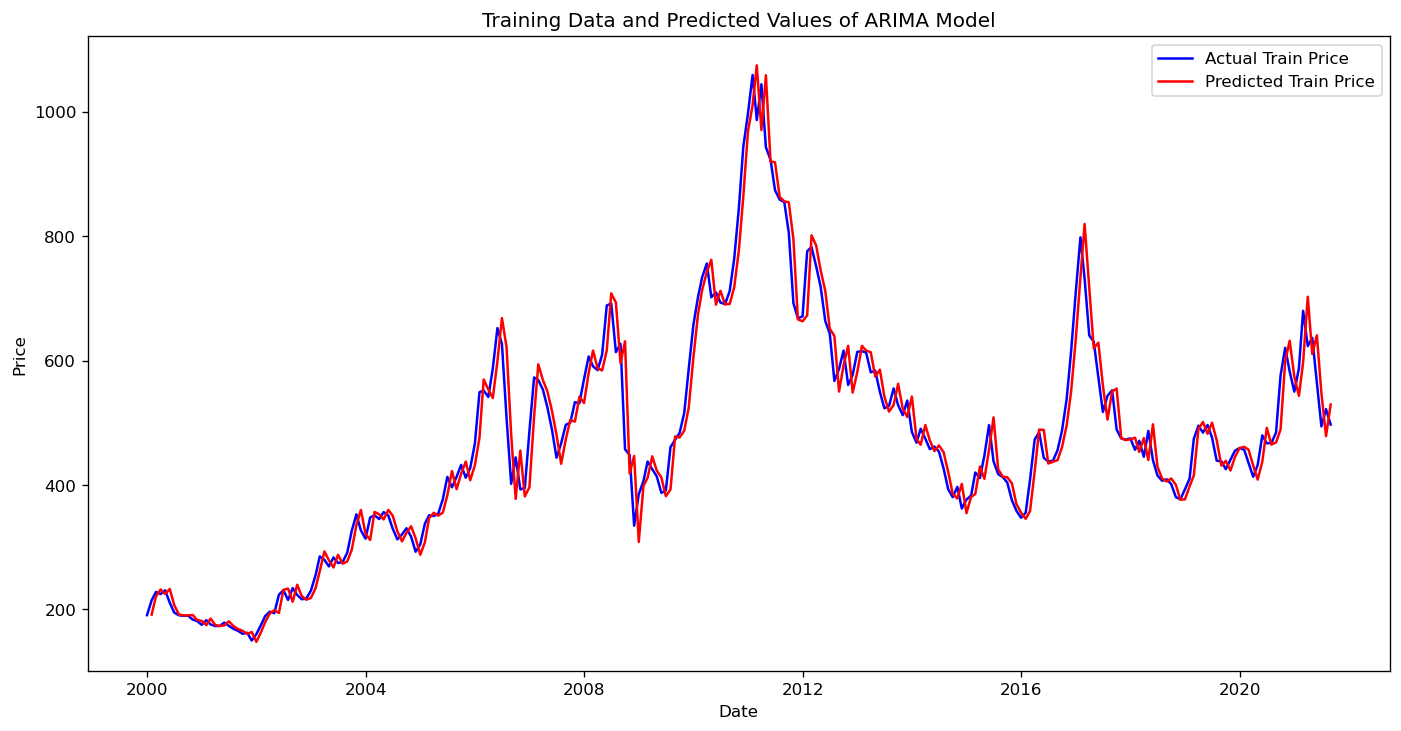

In [35]:
plt.figure(figsize=(14,7))

plt.plot(dataset.index[:len(stat_train)], dataset['Price'][:len(stat_train)], color='blue', label='Actual Train Price')
plt.plot(stat_train.index, stat_train['ARIMA-GARCH Forecast'], color='red', label='Predicted Train Price')

plt.title('Training Data and Predicted Values of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

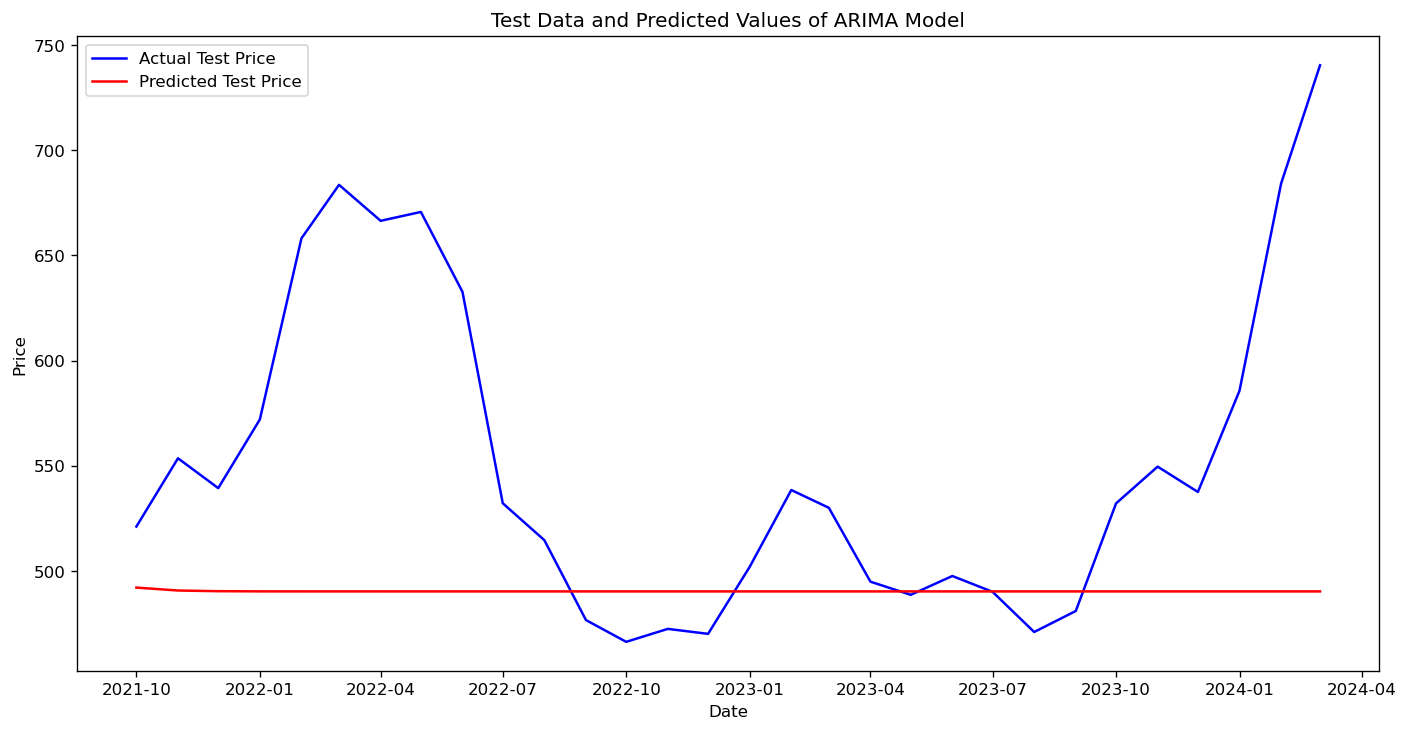

In [36]:
# Get test index after making predictions for the test data
test_index = dataset.index[-len(test_prediction):]

plt.figure(figsize=(14, 7))
plt.plot(test_index, stat_test['Price'], color='blue', label='Actual Test Price')
plt.plot(test_index, stat_test['ARIMA-GARCH Forecast'], color='red', label='Predicted Test Price')
plt.title('Test Data and Predicted Values of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

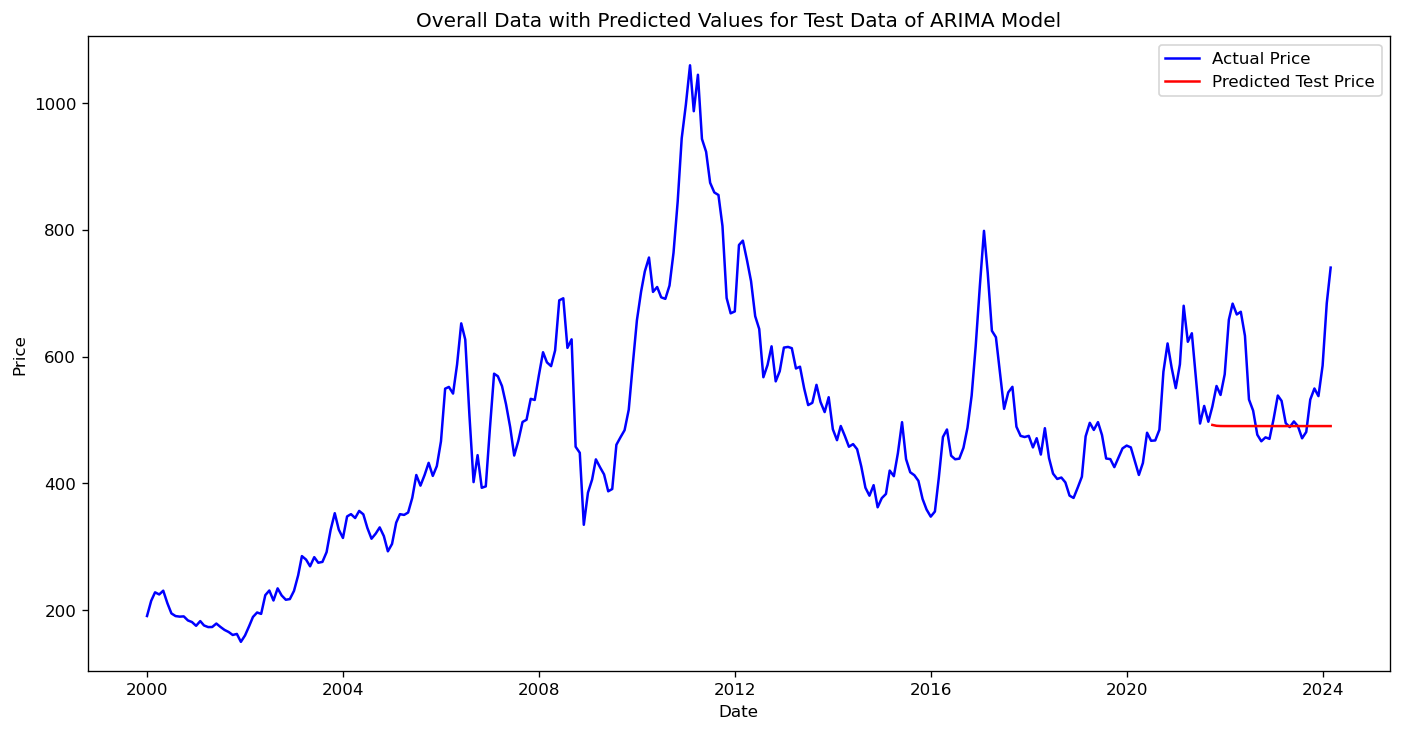

In [37]:
plt.figure(figsize=(14,7))

plt.plot(dataset['Price'], color='blue', label='Actual Price')
plt.plot(stat_test['ARIMA-GARCH Forecast'], color='red', label='Predicted Test Price')
plt.title('Overall Data with Predicted Values for Test Data of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
# Calculate evaluation metrics
train_rmse = np.sqrt(mean_squared_error(stat_train['Price'].iloc[1:], train_prediction))
train_mae = mean_absolute_error(stat_train['Price'].iloc[1:], train_prediction)
train_mape = np.mean(np.abs((stat_train['Price'].iloc[1:] - train_prediction) / stat_train['Price'])) * 100
train_r2 = r2_score(stat_train['Price'].iloc[1:], train_prediction)

In [39]:
test_rmse = np.sqrt(mean_squared_error(stat_test['Price'], test_prediction))
test_mae = mean_absolute_error(stat_test['Price'], test_prediction)
test_mape = np.mean(np.abs((stat_test['Price'] - test_prediction) / stat_test['Price'])) * 100
test_r2 = r2_score(stat_test['Price'], test_prediction)

In [40]:
# Organize evaluation metrics into a DataFrame
metrics_data = {
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R2 Score'],
    'Train': [train_rmse, train_mae, train_mape, train_r2],
    'Test': [test_rmse, test_mae, test_mape, test_r2]
}

metrics_df = pd.DataFrame(metrics_data)
print("\nEvaluation Metrics:")
print(metrics_df)


Evaluation Metrics:
     Metric      Train       Test
0      RMSE  38.211539  98.004060
1       MAE  27.630546  68.446032
2      MAPE   5.725602  11.061489
3  R2 Score   0.955331  -0.646551


## Section 4.2: Double Exponential Smoothing Model

In [41]:
# Apply Double Exponential Smoothing (Holt's method)
DES_model = ExponentialSmoothing(stat_train['Price'], trend='add')
result = DES_model.fit()

C:\Users\lynnl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
# Forecast future prices
forecast_train = result.predict(start=stat_train.index[0], end=stat_train.index[-1])  # Forecasting 12 months ahead
forecast_test = result.forecast(steps=len(stat_test))  # Forecasting 12 months ahead

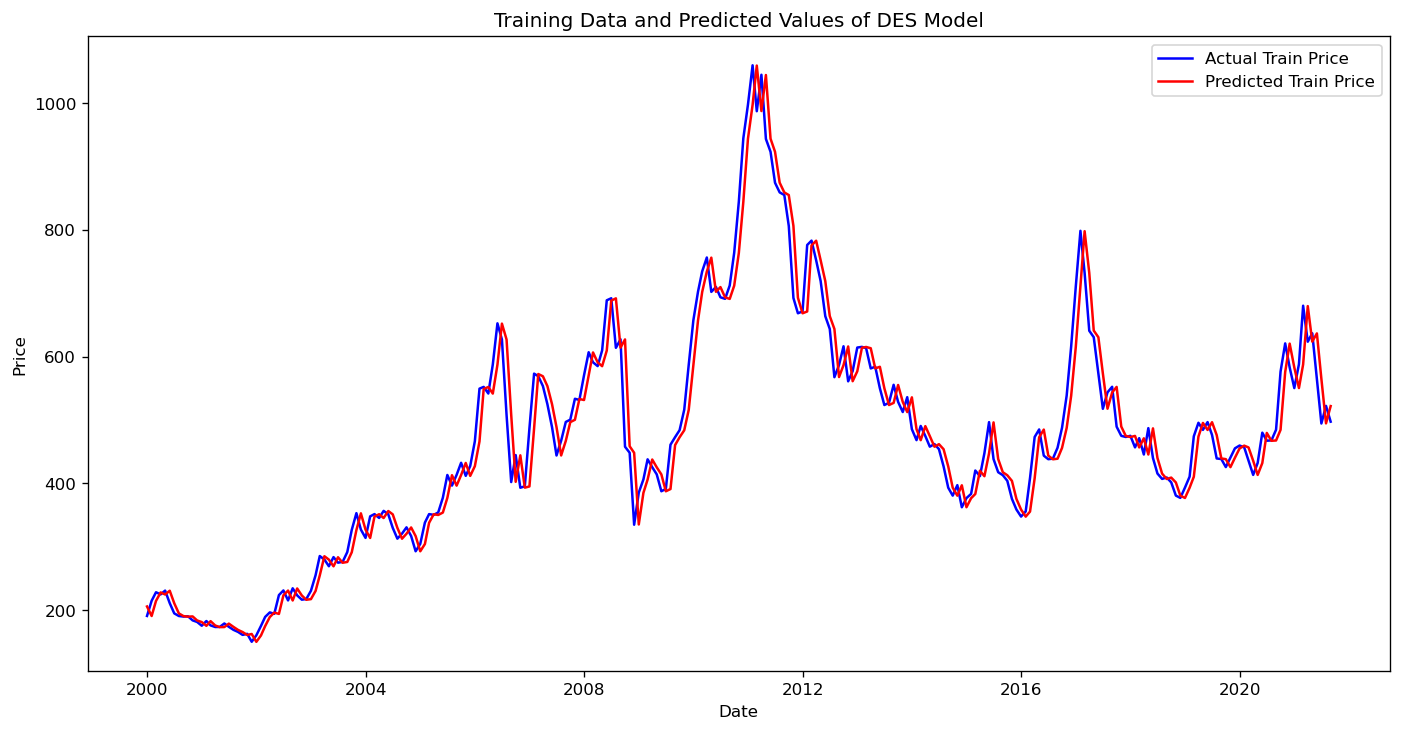

In [43]:
plt.figure(figsize=(14,7))

plt.plot(dataset.index[:len(stat_train)], dataset['Price'][:len(stat_train)], color='blue', label='Actual Train Price')
plt.plot(stat_train.index, forecast_train, color='red', label='Predicted Train Price')

plt.title('Training Data and Predicted Values of DES Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

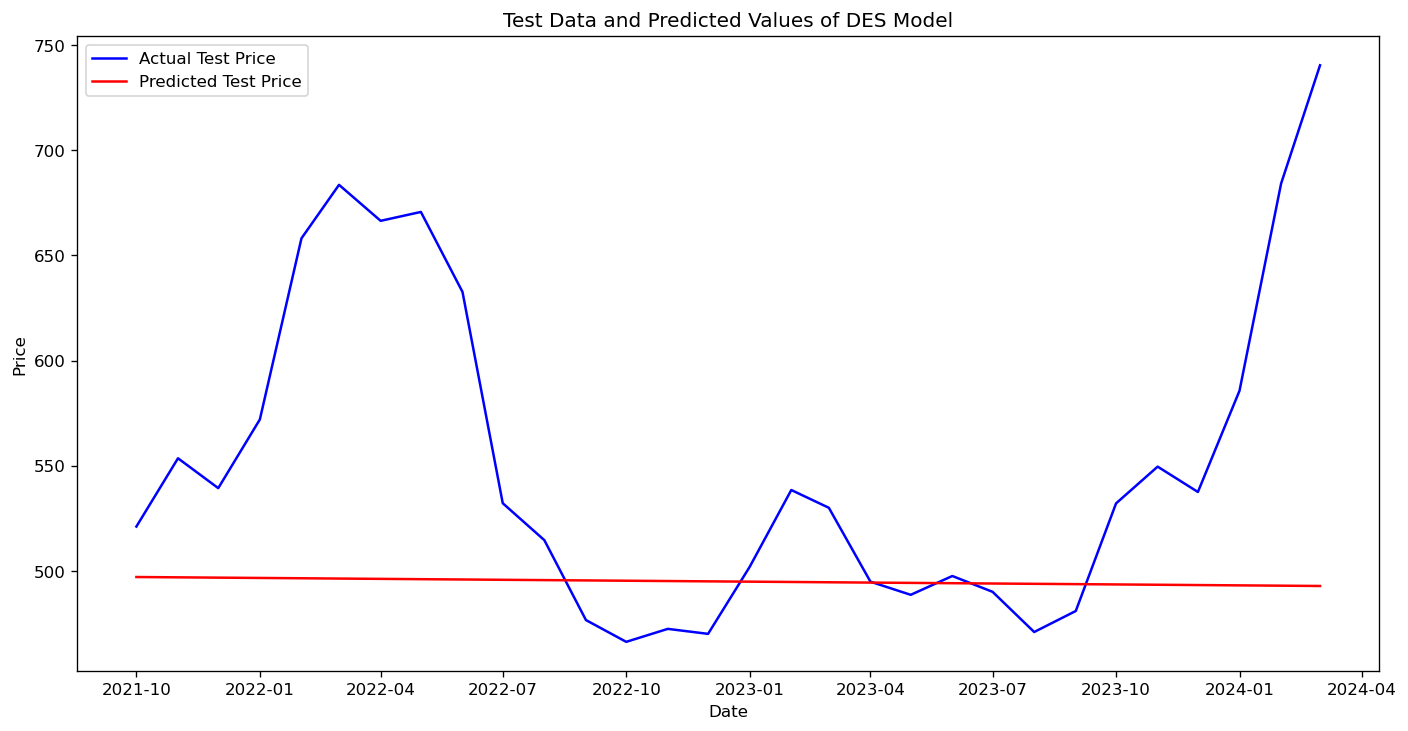

In [44]:
# Get test index after making predictions for the test data
test_index = dataset.index[-len(forecast_test):]

plt.figure(figsize=(14, 7))
plt.plot(test_index, stat_test['Price'], color='blue', label='Actual Test Price')
plt.plot(test_index, forecast_test, color='red', label='Predicted Test Price')
plt.title('Test Data and Predicted Values of DES Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

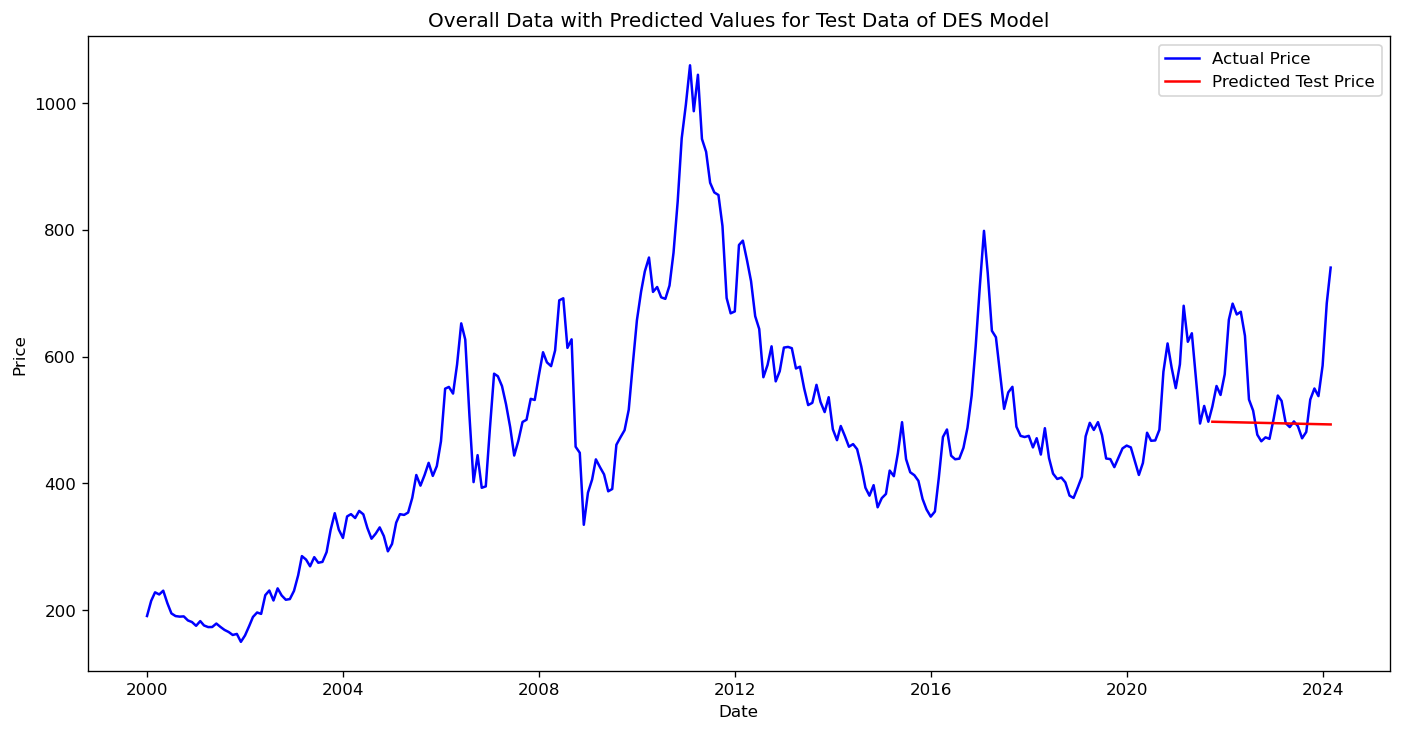

In [45]:
# Plot forecast
plt.figure(figsize=(14, 7))
plt.plot(dataset, color='blue', label='Actual Price')
plt.plot(forecast_test, color='red', label='Predicted Test Price')
plt.title('Overall Data with Predicted Values for Test Data of DES Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
# Calculate evaluation metrics
train_rmse = np.sqrt(mean_squared_error(stat_train['Price'], forecast_train))
train_mae = mean_absolute_error(stat_train['Price'], forecast_train)
train_mape = np.mean(np.abs((stat_train['Price'] - forecast_train) / stat_train['Price'])) * 100
train_r2 = r2_score(stat_train['Price'], forecast_train)

In [47]:
test_rmse = np.sqrt(mean_squared_error(stat_test['Price'], forecast_test))
test_mae = mean_absolute_error(stat_test['Price'], forecast_test)
test_mape = np.mean(np.abs((stat_test['Price'] - forecast_test) / stat_test['Price'])) * 100
test_r2 = r2_score(stat_test['Price'], forecast_test)

In [48]:
# Organize evaluation metrics into a DataFrame
metrics_data = {
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R2 Score'],
    'Train': [train_rmse, train_mae, train_mape, train_r2],
    'Test': [test_rmse, test_mae, test_mape, test_r2]
}

metrics_df = pd.DataFrame(metrics_data)
print("\nEvaluation Metrics:")
print(metrics_df)


Evaluation Metrics:
     Metric      Train       Test
0      RMSE  39.327104  95.088586
1       MAE  28.207790  66.141916
2      MAPE   5.827935  10.699450
3  R2 Score   0.952930  -0.550043


## Section 4.3: LSTM Model

In [49]:
# Function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

In [50]:
seq_length = 10

In [51]:
# Generate sequences for training and testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [52]:
# Define a function to create and compile the LSTM model
def create_model(units=50, learning_rate=0.001, dropout_rate=0.2, batch_size=32,epochs=100):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [53]:
# Define parameter distribution for randomized search
param_dist = {
    'model__units': randint(50, 150),               # Randomly select numbers of LSTM units
    'model__learning_rate': uniform(0.0001, 0.01),  # Randomly select learning rates in range [0.0001, 0.01]
    'model__epochs': [50, 100, 150],                # Select specific numbers of epochs
    'model__dropout_rate': [0.1, 0.2, 0.3],         # Select specific dropout rates
    'model__batch_size': [16, 32, 64]               # Select specific batch sizes
}

In [54]:
# Create the LSTM model
lstm_model = KerasRegressor(model=create_model, verbose=0)

In [55]:
# Perform randomized search
random_search = RandomizedSearchCV(estimator=lstm_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3)
random_search_result = random_search.fit(X_train, y_train)

In [56]:
# Print the best parameters and score
print("Best Parameters:", random_search_result.best_params_)
print("Best Score:", -random_search_result.best_score_)

Best Parameters: {'model__batch_size': 16, 'model__dropout_rate': 0.2, 'model__epochs': 50, 'model__learning_rate': 0.006013549963709951, 'model__units': 50}
Best Score: 0.3692241278973374


In [57]:
# Store the best paramater
best_units = random_search_result.best_params_['model__units']
best_learning_rate = random_search_result.best_params_['model__learning_rate']
best_epochs = random_search_result.best_params_['model__epochs']
best_dropout_rate = random_search_result.best_params_['model__dropout_rate']
best_batch_size = random_search_result.best_params_['model__batch_size']

In [58]:
# Use the best parameters to create and train the final model
final_model = create_model(units=best_units, learning_rate=best_learning_rate, 
                           dropout_rate=best_dropout_rate, batch_size=best_batch_size)
history = final_model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
16/16 [==============================] - 4s 53ms/step - loss: 0.3317 - val_loss: 0.3105
Epoch 2/50
16/16 [==============================] - 0s 10ms/step - loss: 0.1910 - val_loss: 0.1818
Epoch 3/50
16/16 [==============================] - 0s 10ms/step - loss: 0.1396 - val_loss: 0.1138
Epoch 4/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0996 - val_loss: 0.0603
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0967 - val_loss: 0.0623
Epoch 6/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0738 - val_loss: 0.0536
Epoch 7/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0696 - val_loss: 0.0459
Epoch 8/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0695 - val_loss: 0.0381
Epoch 9/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0728 - val_loss: 0.0432
Epoch 10/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0653 - val_loss: 0.0456
Epoch 11/

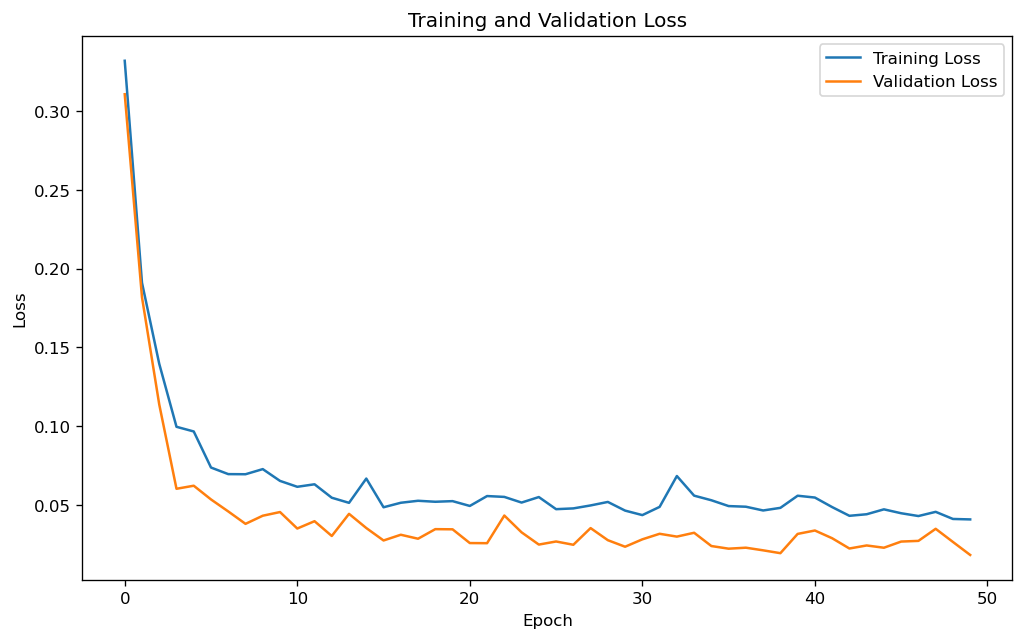

In [59]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
# Make predictions
train_predictions = final_model.predict(X_train)
test_predictions = final_model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [61]:
# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

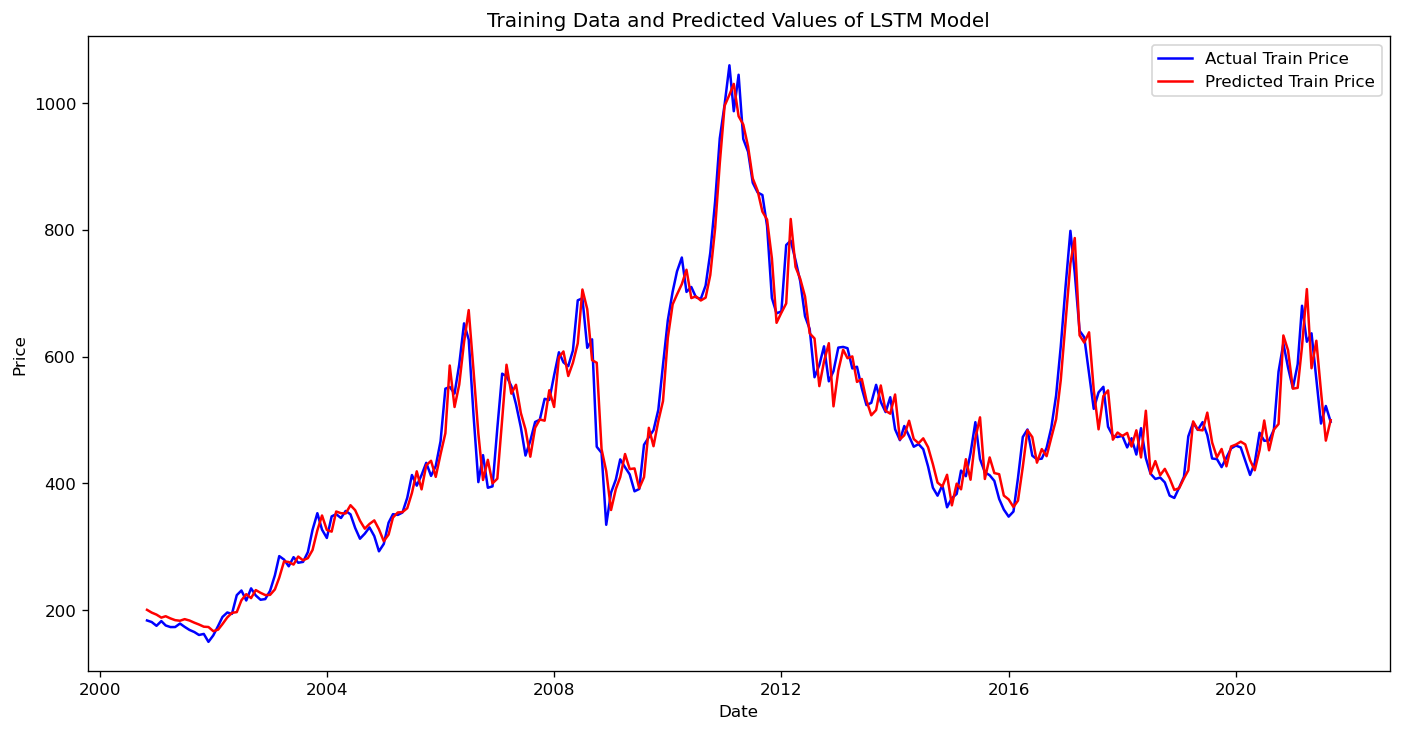

In [62]:
# Step 6: Visualize the results
plt.figure(figsize=(14, 7))

# Plotting training data
plt.plot(dataset.index[seq_length:seq_length+len(train_predictions)], y_train[0], color='blue', label='Actual Train Price')
plt.plot(dataset.index[seq_length:seq_length+len(train_predictions)], train_predictions[:, 0], color='red', label='Predicted Train Price')

plt.title('Training Data and Predicted Values of LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

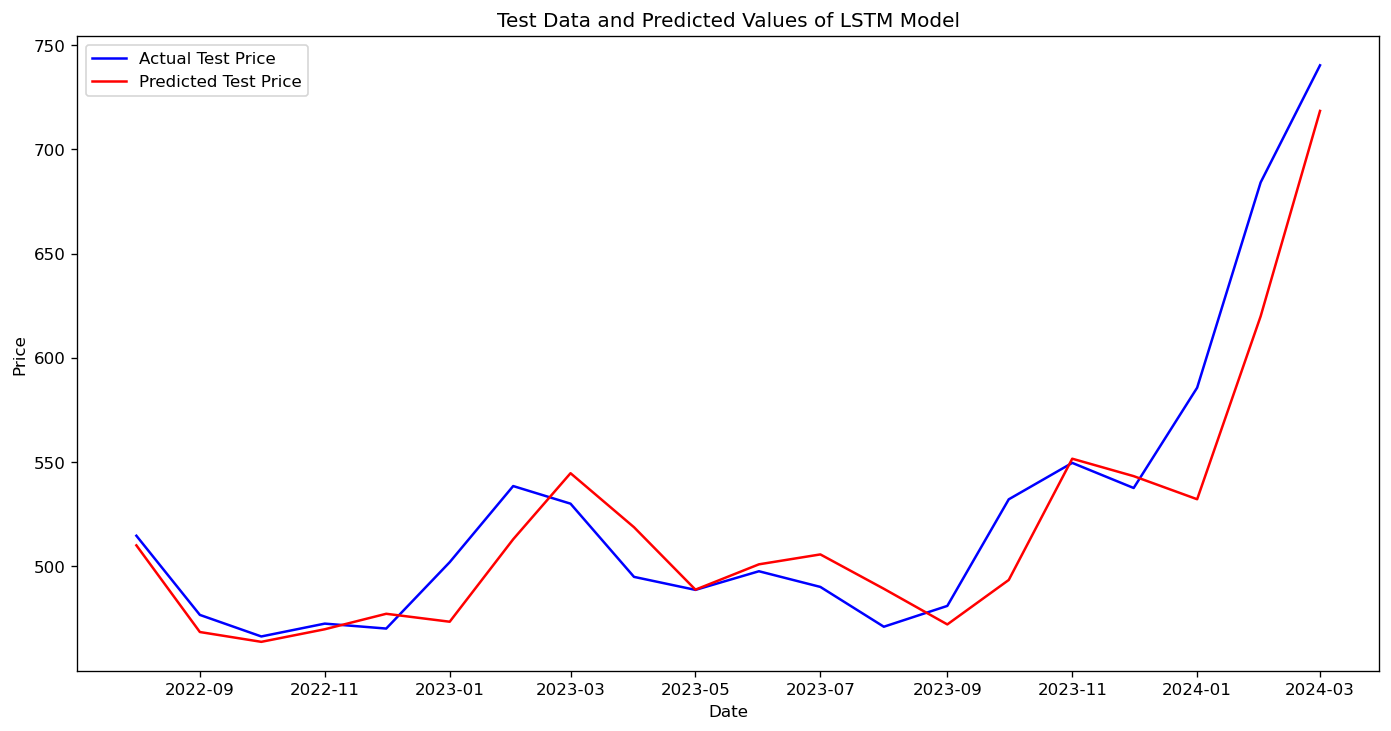

In [63]:
# Get test index after making predictions for the test data
test_index = dataset.index[-len(test_predictions):]

# Third Graph: Test Data with Predicted Values
plt.figure(figsize=(14, 7))
plt.plot(test_index, y_test[0], color='blue', label='Actual Test Price')
plt.plot(test_index, test_predictions[:, 0], color='red', label='Predicted Test Price')
plt.title('Test Data and Predicted Values of LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

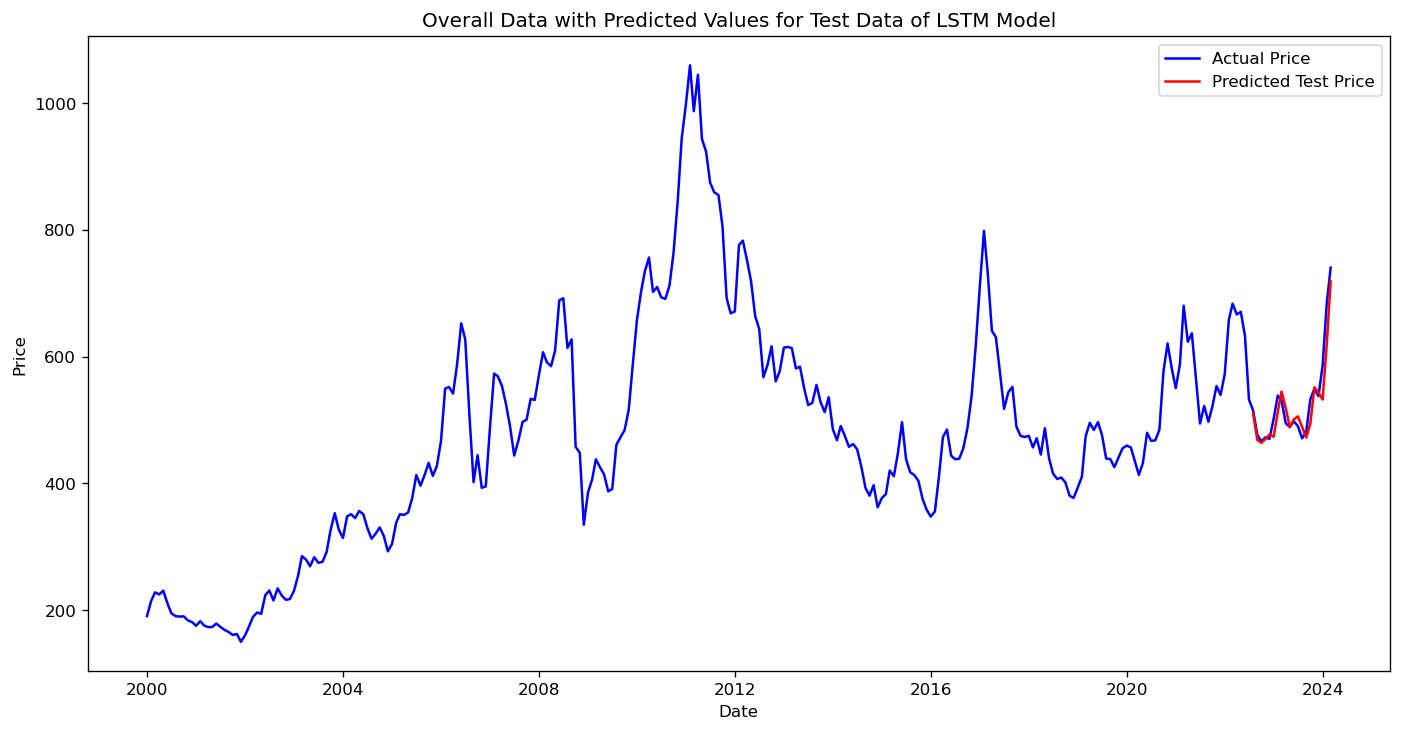

In [64]:
# Second Graph: Overall Data with Predicted Values for Test Data
plt.figure(figsize=(14, 7))
plt.plot(dataset.index, dataset['Price'], color='blue', label='Actual Price')
plt.plot(test_index, test_predictions[:, 0], color='red', label='Predicted Test Price')
plt.title('Overall Data with Predicted Values for Test Data of LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
# Calculate evaluation metrics
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predictions[:, 0]))
train_mae = mean_absolute_error(y_train[0], train_predictions[:, 0])
train_mape = np.mean(np.abs((y_train[0] - train_predictions[:, 0]) / y_train[0])) * 100
train_r2 = r2_score(y_train[0], train_predictions[:, 0])

In [66]:
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predictions[:, 0]))
test_mae = mean_absolute_error(y_test[0], test_predictions[:, 0])
test_mape = np.mean(np.abs((y_test[0] - test_predictions[:, 0]) / y_test[0])) * 100
test_r2 = r2_score(y_test[0], test_predictions[:, 0])

In [67]:
# Organize evaluation metrics into a DataFrame
metrics_data = {
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R2 Score'],
    'Train': [train_rmse, train_mae, train_mape, train_r2],
    'Test': [test_rmse, test_mae, test_mape, test_r2]
}

metrics_df = pd.DataFrame(metrics_data)
print("\nEvaluation Metrics:")
print(metrics_df)


Evaluation Metrics:
     Metric      Train       Test
0      RMSE  32.674954  24.557497
1       MAE  24.924326  17.488737
2      MAPE   5.431409   3.149571
3  R2 Score   0.965916   0.876370
